# SMART IRRIGATION SYSTEM 💦

### This sustainable 'Smart Irrigation System' makes use of moisture level of soil and surrounding temperature readings in order to water gardens just perfectly without wasting water and thus preventing over-irrigation.

## Author: MANASI CHHIBBER

<img src='https://www.backyardboss.net/wp-content/uploads/2021/02/Rotary-Sprinkler-895x448.jpg' width=700>

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

### Getting our Data

In [2]:
df = pd.read_csv(r'../Dataset/data.csv')
df

,crop,moisture,temp,pump
0,cotton,638,16,1
1,cotton,522,18,1
2,cotton,741,22,1
3,cotton,798,32,1
4,cotton,690,28,1
...,...,...,...,...
195,cotton,941,13,1
196,cotton,902,45,1
197,cotton,894,42,1
198,cotton,1022,45,1


### Data Preprocessing

In [3]:
# dropping column 'crop' as the values are constant
df = df.drop(['crop'], axis = 1)
df

,moisture,temp,pump
0,638,16,1
1,522,18,1
2,741,22,1
3,798,32,1
4,690,28,1
...,...,...,...
195,941,13,1
196,902,45,1
197,894,42,1
198,1022,45,1


In [4]:
# checking for null values
df.isnull().any()

moisture    False
temp        False
pump        False
dtype: bool

### Data Visulaization

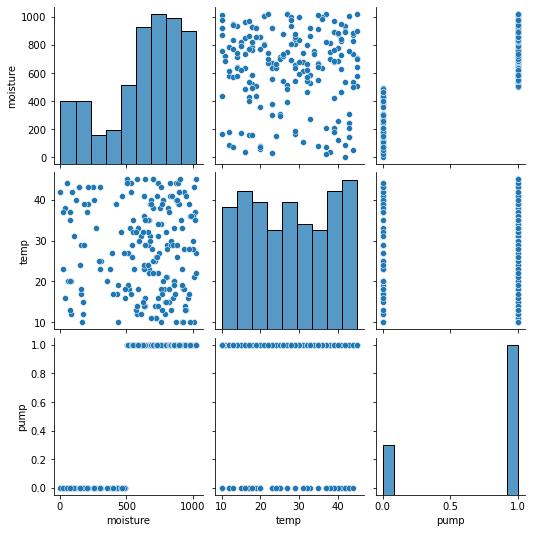

In [5]:
sns.pairplot(df)

### Splitting Data for Training and Testing

In [6]:
data = df.values
X, y = data[:,:-1], data[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)  # splitting in the ratio 80:20

### Building Model and Checking Accuracy

In [7]:
classifier = RandomForestClassifier(random_state=0)  
classifier.fit(X_train, y_train) 
y_pred = classifier.predict(X_test)

# Accuracy
print('Accuracy:', classifier.score(X_test, y_test))

Accuracy: 1.0


### Saving the Model in a pickle file

In [8]:
import pickle
pickle.dump(classifier, open('smartirrigation.pkl', 'wb'))

### Results' Visualization

In [9]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[10,  0],
       [ 0, 30]], dtype=int64)

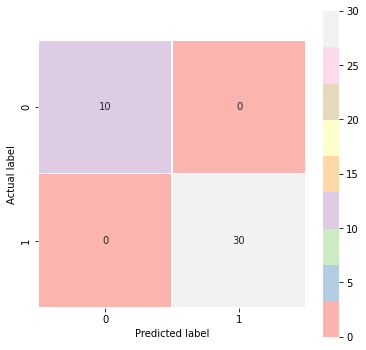

In [10]:
# confusion matrix
plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=0.5, square = True, cmap = 'Pastel1')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

In [11]:
# printing the classification report
class_names = ['0','1']
print(classification_report(y_test, y_pred, target_names=class_names))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        30

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



### Now, your garden is ready to be irrigated sustainably!! 🤩

<img src='https://64.media.tumblr.com/4e59fb29cf306e61b18f1614669ff72e/tumblr_p2xotsv8nV1viuar9o1_1280.gifv' width = 1000>